In [3]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 5.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 4.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.3 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
# Settings for display and style
# pd.set_option('display.max_columns', None)
# sns.set(style="whitegrid")


In [ ]:
# Load dataset
df = pd.read_csv('../Data/neso_historic_demand_combined.csv')

In [ ]:
# 1. Basic info and preview
print(df.info())
print(df.head())

   SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND      TSD  ENGLAND_WALES_DEMAND  \
0              NaN                  1  37910  38704.0                 33939   
1              NaN                  1  34221  35837.0                 30659   
2              NaN                  1  36626  38278.0                 32841   
3              NaN                  1  36713  38749.0                 32988   
4              NaN                  1  35293  38323.0                 31847   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      54.0                  1403.0   
1                      62.0                  1403.0   
2                     229.0                  1403.0   
3                     225.0                  1403.0   
4                     358.0                  1403.0   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                        0.0                      0.0            0   
1                        0.0                      0.0 

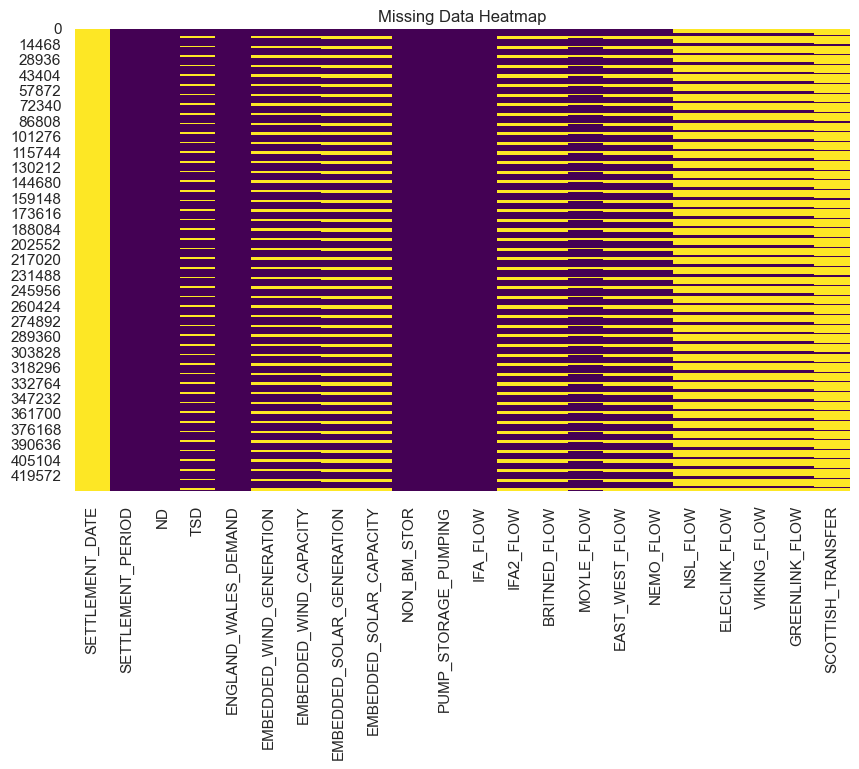

In [31]:
# 3. Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
# 4. Missing values summary
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
SETTLEMENT_DATE              434014
SETTLEMENT_PERIOD                 0
ND                                0
TSD                           70128
ENGLAND_WALES_DEMAND              0
EMBEDDED_WIND_GENERATION     105168
EMBEDDED_WIND_CAPACITY       105168
EMBEDDED_SOLAR_GENERATION    140256
EMBEDDED_SOLAR_CAPACITY      140256
NON_BM_STOR                       0
PUMP_STORAGE_PUMPING              0
IFA_FLOW                          0
IFA2_FLOW                    140256
BRITNED_FLOW                 140256
MOYLE_FLOW                    70128
EAST_WEST_FLOW               140256
NEMO_FLOW                    140256
NSL_FLOW                     315552
ELECLINK_FLOW                315552
VIKING_FLOW                  315552
GREENLINK_FLOW               315552
SCOTTISH_TRANSFER            385680
dtype: int64


In [16]:
# 5. Impute missing values for numerical columns (median)
for col in df.select_dtypes(include=np.number).columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)
    # For more advanced imputation, see your school's notes (groupwise/model-based)

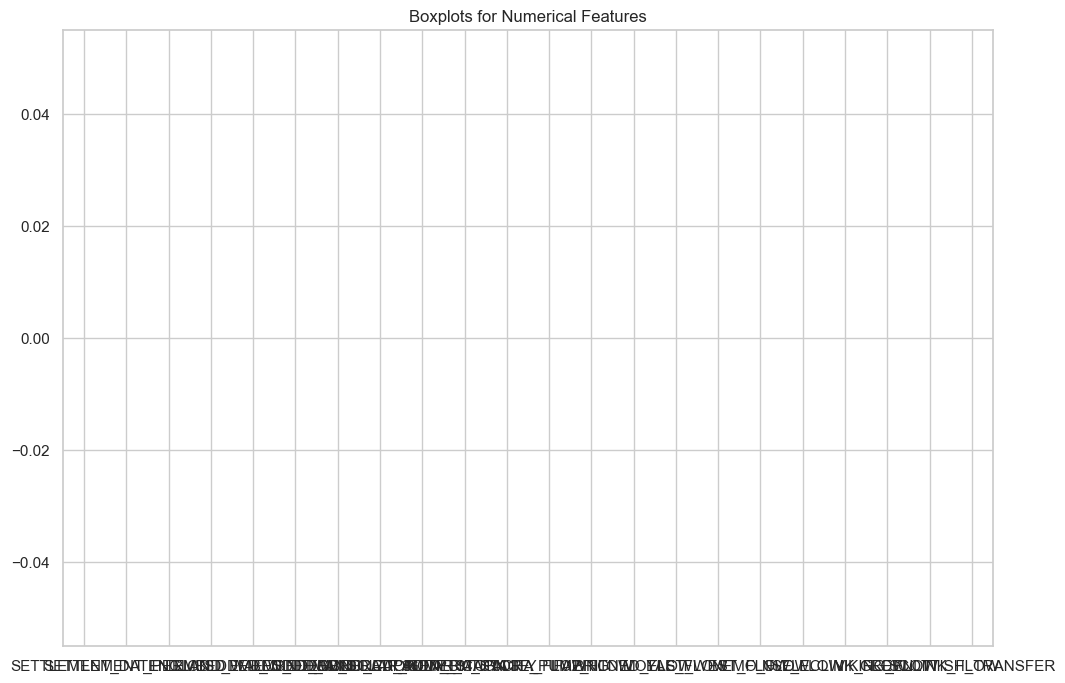

In [17]:
# 6. Outlier detection and visualization (boxplots)
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
df[num_cols].boxplot()
plt.title('Boxplots for Numerical Features')
plt.show()

In [18]:
# 7. Remove outliers using conservative IQR method (k=3)
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 3*IQR, Q3 + 3*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

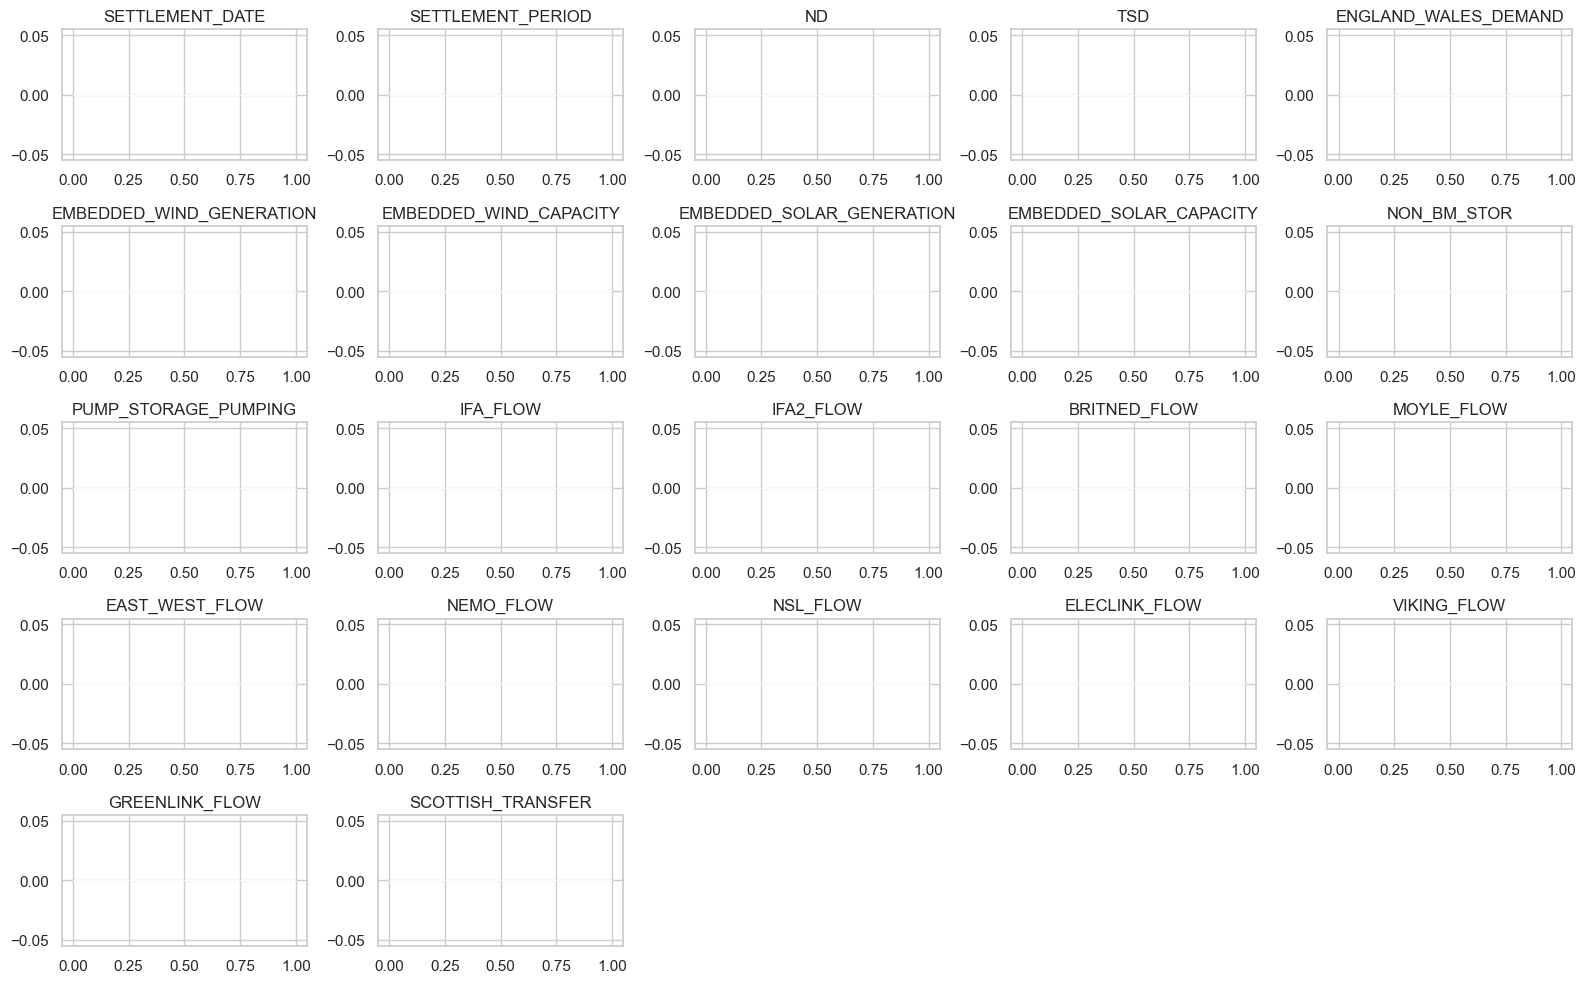

In [19]:
# 8. Visualize feature distributions (histograms for numeric columns)
df[num_cols].hist(bins=20, figsize=(16, 10))
plt.tight_layout()
plt.show()

d:\school\2025-2026\Machine-Learning\Machine-Learning-AWS\ML-Project\Machine-Learning-Project-TM-2025\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\school\2025-2026\Machine-Learning\Machine-Learning-AWS\ML-Project\Machine-Learning-Project-TM-2025\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


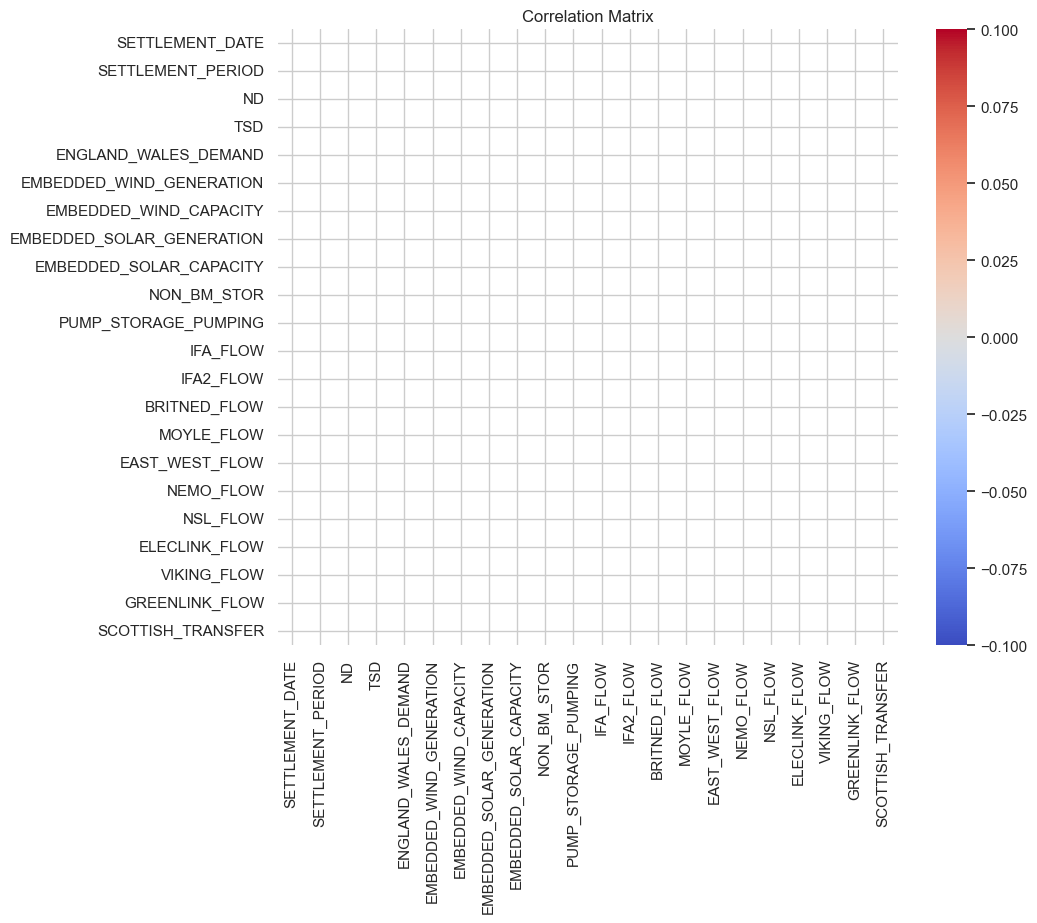

In [20]:
# 9. Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# 10. Explore categorical feature distributions
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8,5))
    df[col].value_counts().plot.bar()
    plt.title(f'Distribution: {col}')
    plt.ylabel('Count')
    plt.show()

In [24]:
# 11. Save cleaned/explored dataset
df.to_csv('cleaned_dataset.csv', index=False)